In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

In [2]:
data = pd.read_csv('data_flats.csv', sep =';')
data.head()

,id,full_sq,life_sq,floor,preschool_education_centers_raion,school_education_centers_raion,school_education_centers_top_20_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,...,shopping_centers_raion,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,mkad_km,bulvar_ring_km,kremlin_km,price_doc
0,1,43,27.0,4.0,5,5,0,0,7,3,...,16,1.131260,0.145700,0.177975,2.158587,0.600973,1.422391,13.675657,15.156211,5850000
1,2,34,19.0,3.0,5,8,0,0,6,1,...,3,0.635053,0.147754,0.273345,0.550690,0.065321,9.503405,8.132640,8.698054,6000000
2,3,43,29.0,2.0,4,7,0,0,5,1,...,0,1.445960,0.049102,0.158072,0.374848,0.453172,5.604800,8.054252,9.067885,5700000
3,4,89,50.0,9.0,9,10,0,0,17,6,...,11,0.963802,0.179441,0.236455,0.078090,0.106125,2.677824,18.309433,19.487005,13100000
4,5,77,77.0,4.0,7,9,0,2,25,2,...,10,0.688859,0.247901,0.376838,0.258289,0.236214,11.616653,0.787593,2.578671,16331452


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   preschool_education_centers_raion      30469 non-null  int64  
 5   school_education_centers_raion         30469 non-null  int64  
 6   school_education_centers_top_20_raion  30469 non-null  int64  
 7   university_top_20_raion                30469 non-null  int64  
 8   sport_objects_raion                    30469 non-null  int64  
 9   additional_education_raion             30469 non-null  int64  
 10  culture_objects_top_25_raion           30469 non-null  int64  
 11  sh

In [4]:
data.isnull().sum()

id                                          0
full_sq                                     0
life_sq                                  6383
floor                                     167
preschool_education_centers_raion           0
school_education_centers_raion              0
school_education_centers_top_20_raion       0
university_top_20_raion                     0
sport_objects_raion                         0
additional_education_raion                  0
culture_objects_top_25_raion                0
shopping_centers_raion                      0
metro_km_walk                              25
kindergarten_km                             0
school_km                                   0
park_km                                     0
green_zone_km                               0
mkad_km                                     0
bulvar_ring_km                              0
kremlin_km                                  0
price_doc                                   0
dtype: int64

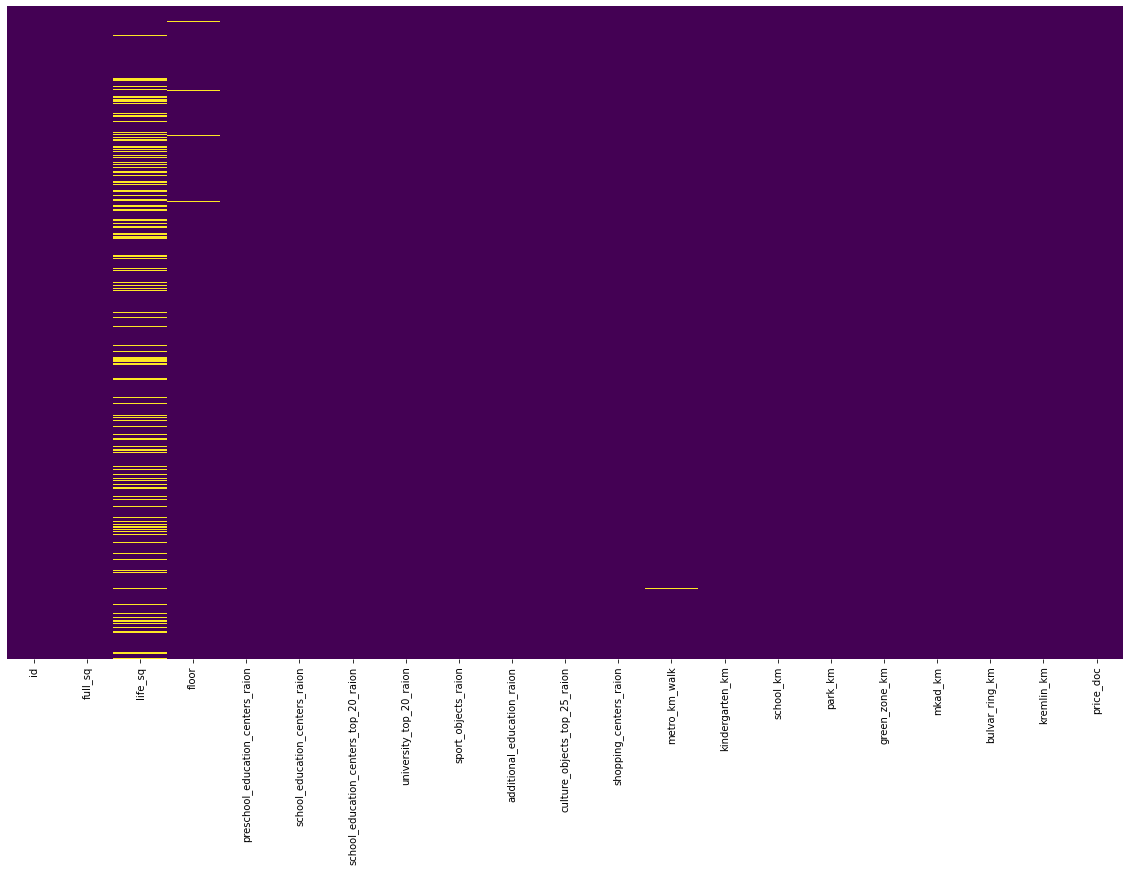

In [5]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

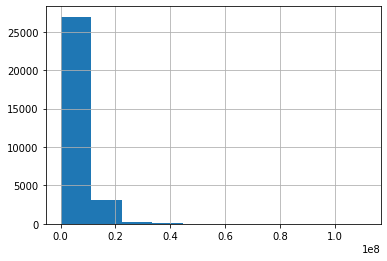

In [6]:
data.price_doc.hist();

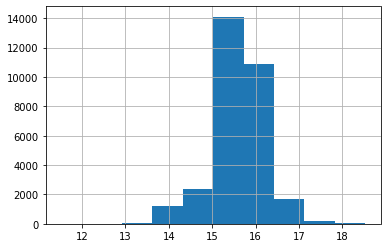

In [7]:
data['price_doc'] = data['price_doc'].apply(lambda w: np.log(w + 1))
data.price_doc.hist();

<AxesSubplot:>

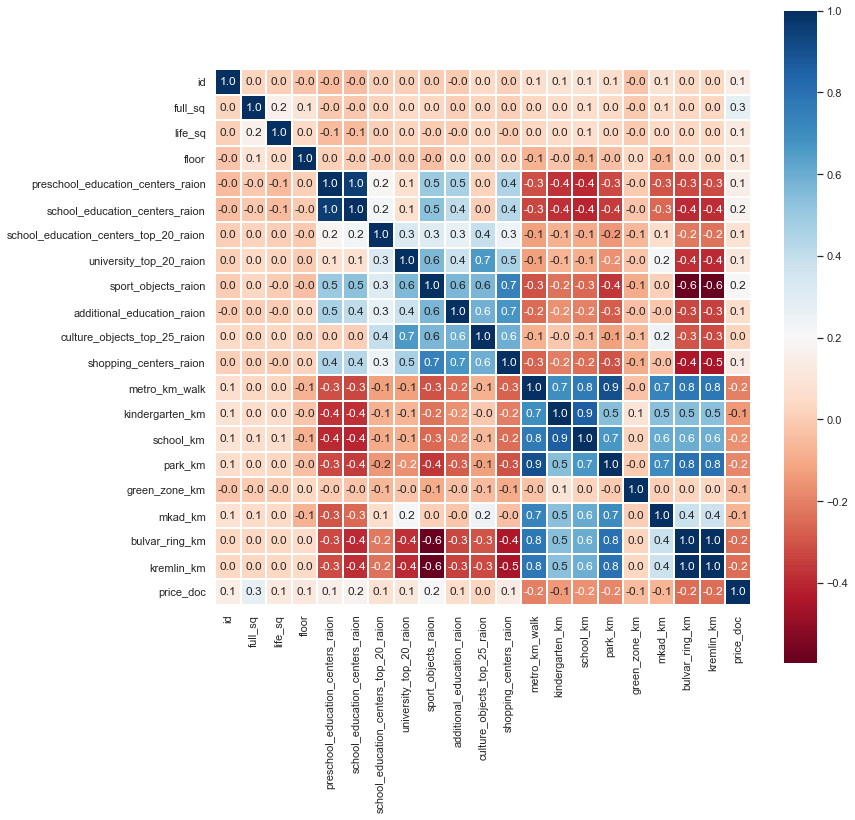

In [8]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

In [9]:
data.columns

Index(['id', 'full_sq', 'life_sq', 'floor',
       'preschool_education_centers_raion', 'school_education_centers_raion',
       'school_education_centers_top_20_raion', 'university_top_20_raion',
       'sport_objects_raion', 'additional_education_raion',
       'culture_objects_top_25_raion', 'shopping_centers_raion',
       'metro_km_walk', 'kindergarten_km', 'school_km', 'park_km',
       'green_zone_km', 'mkad_km', 'bulvar_ring_km', 'kremlin_km',
       'price_doc'],
      dtype='object')

In [10]:
data.drop(
    [
        "preschool_education_centers_raion",
        "kindergarten_km",
        "park_km",
        "kremlin_km",
        "life_sq",
    ],
    axis=1,
    inplace=True
)

In [11]:
data.isnull().sum()

id                                         0
full_sq                                    0
floor                                    167
school_education_centers_raion             0
school_education_centers_top_20_raion      0
university_top_20_raion                    0
sport_objects_raion                        0
additional_education_raion                 0
culture_objects_top_25_raion               0
shopping_centers_raion                     0
metro_km_walk                             25
school_km                                  0
green_zone_km                              0
mkad_km                                    0
bulvar_ring_km                             0
price_doc                                  0
dtype: int64

In [12]:
data.dropna(axis=0, inplace=True)

In [13]:
X = data.iloc[:,1:-1].values
Y = data.iloc[:,-1:].values

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=77)


In [47]:
scaler = RobustScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

In [50]:
myModel = LinearRegression()
myModel.fit(X_train_norm,Y_train)

LinearRegression()

In [51]:
y_pred = myModel.predict(X_test_norm)

In [53]:
y_pred = np.exp(y_pred) - 1
Y_test = np.exp(Y_test) - 1

In [57]:
MSE = round(metrics.mean_squared_error(Y_test, y_pred))
print(MSE)

16647931507747
